In [1]:
#!pip install nltk
#!pip install autocorrect
#!pip install scikit-learn

# for Preprocessing NLP Data
- removing non alphabatic characters
- lowering the format
- tokeninzation
- remove stop words
- steming / lemitization
- spell correction


In [1]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
from tqdm import tqdm
import re

In [3]:
data=pd.read_csv(r'spam.csv',encoding='ISO-8859-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [8]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Lets Visualize the Spam words

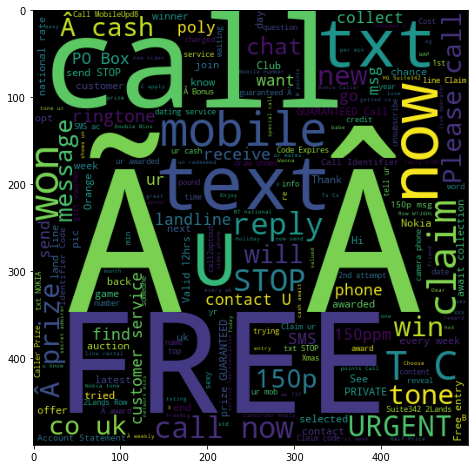

In [9]:
spam_words= ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Lets Visualize the Ham words

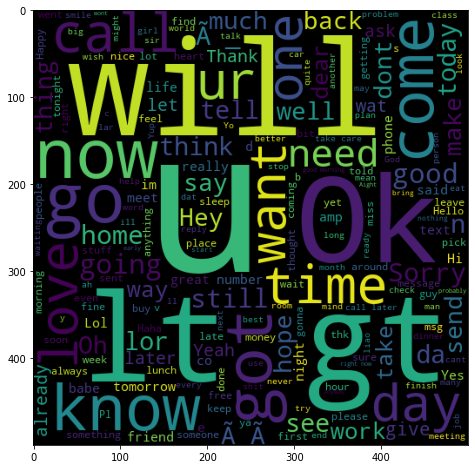

In [10]:
spam_words= ' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc= WordCloud(width=500,height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

# Preprocessing the Data

In [11]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.shape

(5572, 2)

In [13]:
# Encoding our Labels
data['labels']=data['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Supriya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [16]:
# preprocessing the Messages
new_data=[]

for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    # removing non alphabatic characters
    lines= re.sub('[^A-Za-z]',' ',lines)
    # lowering the every word
    lines=lines.lower()
    
    # tokenization
    tokenized_lines=word_tokenize(lines)
    
    # removing stop words ,stemming and spell correction
    processed_lines=[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=' '.join(processed_lines)
    new_data.append(final_lines)
    
            
    

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [13:05<00:00,  7.09it/s]


In [17]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [18]:
len(new_data)

5572

In [19]:
Y=data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [20]:
Y.value_counts()

0    4825
1     747
Name: labels, dtype: int64

# splitting the data into training and testing

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(new_data,Y,test_size=0.25)

In [22]:
X_train

['still west coast hair take fore come back',
 'getting rdi ship comp',
 'ok ok ok what ur today plan',
 'plz tell an bslvyl sent via fullonsm com',
 'er hello thing quit go plan limp slowly home follow aa exhaust hang',
 'doi luck win big title win',
 'ama rearrange letter give mean dormitory dirty room astronomy moon starter eye see elect result lie let recount mother law woman hitler eleven pl two twelve pl one ama',
 'ard like dat lor',
 'good thing get connect bw',
 'wonder world th th ur style th ur smile th ur person rd ur natur nd ur sm st ur love friendship good more dear',
 'although told u dat big face watch really like e watch u gave co fr u than every dat u done today touch',
 'money steve mate',
 'kate jackson rec center ish right',
 'beauty tomorrow never come come already today hunt beauty tomorrow was wonder today goodman',
 'also da feel yesterday night wait til day night dear',
 'ok',
 'gon na worry not give money use',
 'yep like pink furniture tho',
 'hope ur head 

In [23]:
X_test

['congratul week competed draw u prize claim call b cs stop sm ppm',
 'tri call reply sm video mobil min limit text free accord reply call',
 'wait till end march el nine get oh',
 'watch lor saw watch one the quit ok ard need nd opinion leh',
 'oh love soon good hear omg miss much today sorry problem provide thank thing',
 'ya ok nikki vl c within lt gt min il reply u',
 'roman pari night flight book next year call ts cs apply',
 'dear cherthala case u r come coaching pl call before u start shall also reach accordingly tell day u r come throw engage an holiday',
 'ok the got u wan come wat',
 'oh ok',
 'hi away online yahoo would like chat someday',
 'ok part tomorrow',
 'sure when show fuck gt',
 'time n smile r two crucial thing life sometime time make us forget smile sometime someone smile make us forget time gun noon',
 'text way cup stop work bu',
 'erutupalam thandiyachu',
 'okay chase dream good next',
 'hi end ok journey terrible wk good huge back log mark',
 'happy baby alrig

In [24]:
Y_train

4420    0
4555    0
1122    0
3847    0
4803    0
       ..
1698    1
622     0
4060    0
4342    0
4760    0
Name: labels, Length: 4179, dtype: int64

In [25]:
Y_test

2123    1
4089    1
1255    0
4117    0
2092    0
       ..
5287    0
4222    0
393     0
1978    0
2524    1
Name: labels, Length: 1393, dtype: int64

# Vectorization using Bag of Words

In [26]:
from sklearn.feature_extraction.text import CountVectorizer  #tf_idf
matrix=CountVectorizer()

In [27]:
X_train_vect=matrix.fit_transform(X_train).toarray()
X_test_vect=matrix.transform(X_test).toarray()

In [28]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
X_test_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [30]:
Y_train

4420    0
4555    0
1122    0
3847    0
4803    0
       ..
1698    1
622     0
4060    0
4342    0
4760    0
Name: labels, Length: 4179, dtype: int64

In [31]:
Y_test

2123    1
4089    1
1255    0
4117    0
2092    0
       ..
5287    0
4222    0
393     0
1978    0
2524    1
Name: labels, Length: 1393, dtype: int64

# Lets train our Model - Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [33]:
model.fit(X_train_vect,Y_train)

GaussianNB()

In [34]:
model.classes_

array([0, 1], dtype=int64)

In [35]:
Y_pred=model.predict(X_test_vect)

In [36]:
Y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
accuracy_score(Y_test,Y_pred) * 100

85.71428571428571

In [39]:
confusion_matrix(Y_test,Y_pred)

array([[1034,  176],
       [  23,  160]], dtype=int64)